## Setup
[Case 1]: Using Kaggle API to download dataset on local host

[Case 2]: Running on a Kaggle Notebook/Script

In [1]:
import os

my_os_env = os.environ.get('KAGGLE_KERNEL_RUN_TYPE','')
if my_os_env == '':
    #!pip install
    
    import kaggle
    from kaggle.api.kaggle_api_extended import KaggleApi

    api = KaggleApi()
    api.authenticate()

    if(not os.path.isfile("./data5_6cancer_test_normalized.feather") or not os.path.isfile("./data5_6cancer_train_normalized.feather")):
        api.dataset_download_files('vggconsulting/data5-6cancer')
        !unzip -o data5-6cancer.zip
        !rm data5-6cancer.zip

    datafile = os.getcwd()+'/data5_6cancer_test_normalized.feather'

elif my_os_env == 'Interactive' or my_os_env == 'Batch':
    # This Python 3 environment comes with many helpful analytics libraries installed
    # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
    # For example, here's several helpful packages to load

    #import numpy as np # linear algebra
    #import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

    # Input data files are available in the read-only "../input/" directory
    # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

    for dirname, _, filenames in os.walk('/kaggle/input'):
        for filename in filenames:
            print(os.path.join(dirname, filename))

    # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
    # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

    !pwd
    !ls

    #!git clone https://GitHubClasicKey@github.com/YourGitHub.git

    import os
    #os.chdir('./YourGitHub/')
    !pwd

    #!pip install -r requirements.txt
    #!pip install -r /kaggle/input/requirements-no-mitiq/requirements-no-mitiq.txt

    !ls /kaggle/input/

    datafile = '/kaggle/input/data5-6cancer/data5_6cancer_test_normalized.feather'



# Read in the 6-cancer data

In [2]:
import pandas as pd

#for details see https://pandas.pydata.org/docs/reference/api/pandas.read_feather.html

df = pd.read_feather(datafile)
print(df.shape)

(795, 77633)


In [3]:
df.iloc[0:10, 0:10]

,cancer,cnv_ACAP3,cnv_ACTRT2,cnv_AGRN,cnv_ANKRD65,cnv_ATAD3A,cnv_ATAD3B,cnv_ATAD3C,cnv_AURKAIP1,cnv_B3GALT6
0,lung,-1.181854,-1.181854,-1.181854,-1.181854,-1.181854,-1.181854,-1.181854,-1.181854,-1.181854
1,lung,0.399235,0.399235,0.399235,0.399235,0.399235,0.399235,0.399235,0.399235,0.399235
2,brca,0.399235,0.399235,0.399235,0.399235,0.399235,0.399235,0.399235,0.399235,0.399235
3,lung,0.399235,0.399235,0.399235,0.399235,0.399235,0.399235,0.399235,0.399235,0.399235
4,lgg,-1.181854,-1.181854,-1.181854,-1.181854,-1.181854,-1.181854,-1.181854,-1.181854,-1.181854
5,brca,-1.181854,-1.181854,-1.181854,-1.181854,-1.181854,-1.181854,-1.181854,-1.181854,-1.181854
6,lgg,0.399235,0.399235,0.399235,0.399235,0.399235,0.399235,0.399235,0.399235,0.399235
7,lung,-1.181854,-1.181854,-1.181854,-1.181854,-1.181854,-1.181854,-1.181854,-1.181854,-1.181854
8,coad,0.399235,0.399235,0.399235,0.399235,0.399235,0.399235,0.399235,0.399235,0.399235
9,coad,0.399235,0.399235,0.399235,0.399235,0.399235,0.399235,0.399235,0.399235,0.399235


In [4]:
set(df['cancer'].values).union()

{'brca', 'coad', 'kidn', 'lgg', 'lihc', 'lung'}

In [5]:
set(df["cnv_ACAP3"].values).union()

{-2.762943668782367,
 -1.1818543552733467,
 0.3992349582356737,
 1.980324271744694,
 3.5614135852537143}

In [6]:
cancer_types=sorted(list(set(df['cancer'].values).union()))[0:3]#VGG ajust the classes
cancer_types


['brca', 'coad', 'kidn']

In [7]:
mapping=dict()
for i in range(len(cancer_types)):
    mapping[list(cancer_types)[i]]=(1*i+0*int(len(cancer_types)/2))  #VGG ajust the labels
mapping

{'brca': 0, 'coad': 1, 'kidn': 2}

In [8]:
data=df.loc[df["cancer"].isin(cancer_types)]

In [9]:
diagnosis = data["cancer"]
labels = diagnosis.map(mapping).values
features = data.drop(["cancer"], axis=1)

In [10]:
print(cancer_types,set(labels).union())
data.shape

['brca', 'coad', 'kidn'] {0, 1, 2}


(433, 77633)

# Readin another data for test runs

In [11]:
import pandas as pd

#VGG change in the ifs belw to run with difrent data sets
if False :
    data = pd.read_csv("./breast-cancer.csv") #./ or data/
    diagnosis = data["diagnosis"]
    cancer_types=list(set(diagnosis).union())
    labels = diagnosis.map({"M": 1, "B": -1}).values
    features = data.drop(["id", "diagnosis"], axis=1)

if False :
    data = pd.read_csv("./formatted_titanic.csv") #./ or data/
    labels = 1*(+1+1*data["survived"].values)+1*(-1+1*data["sex"].values)
    cancer_types=[str(i) for i in set(labels).union()]
    features = data.drop(["survived","sex"], axis=1)

print(cancer_types,set(labels).union())
data.shape

['brca', 'coad', 'kidn'] {0, 1, 2}


(433, 77633)

# UMAP to reduced problem dimension and its visualizatoin

In [12]:
# Data visualization
import matplotlib.pyplot as plt
import umap
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

reducer = umap.UMAP(n_components=len(cancer_types)) #VGG adjust the components
embedding = reducer.fit_transform(scaled_features)

embedding.shape


(433, 3)

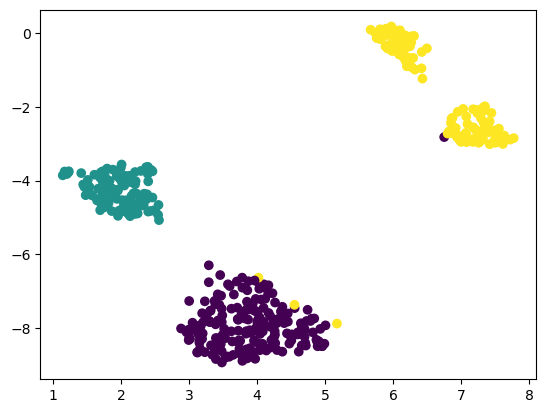

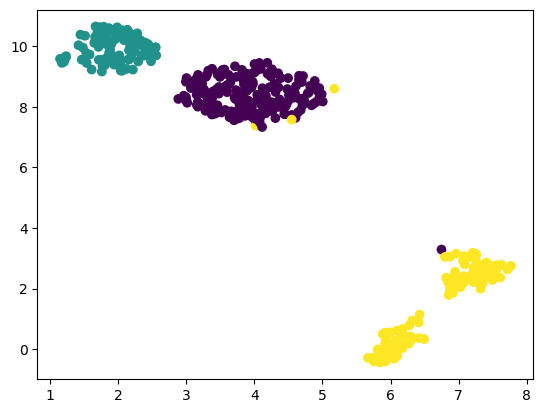

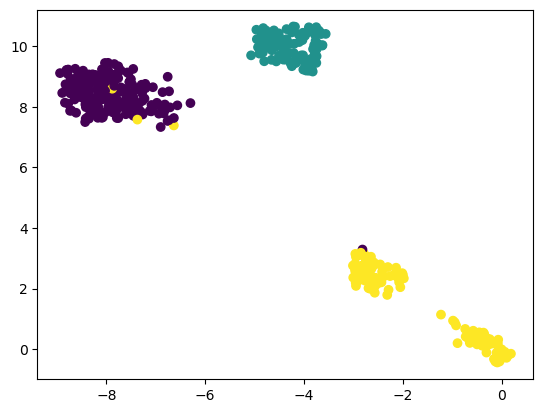

In [13]:
for i in range(embedding.shape[1]):
    for j in range(i+1,embedding.shape[1]):
        plt.show(plt.scatter(embedding[:, i],embedding[:, j], c=labels))

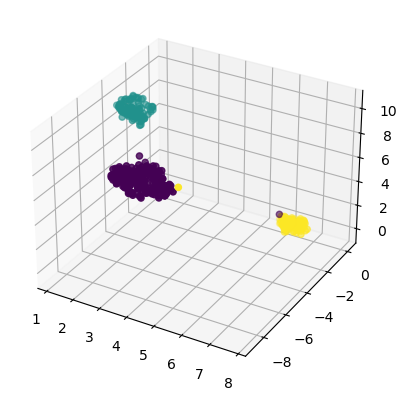

In [14]:
if embedding.shape[1] > 2:
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(embedding[:, 0],embedding[:, 1],embedding[:, 2], c=labels)
    plt.show()

# PCA to reduced problem dimension and its visualizatoin


In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(cancer_types)) #VGG adjust the treshold to arrive at the desired number of PCA componets
features_pca = pca.fit_transform(scaled_features)
pca.n_components_

3

Two components suffice to explain 99% of the variance!

In [16]:
features_pca.shape

(433, 3)

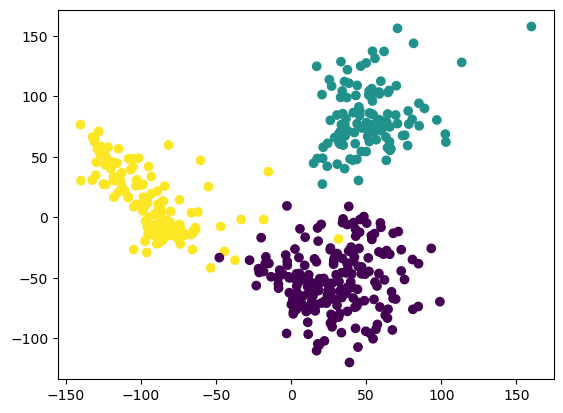

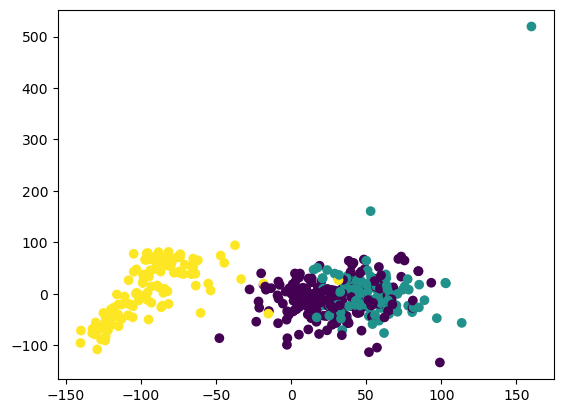

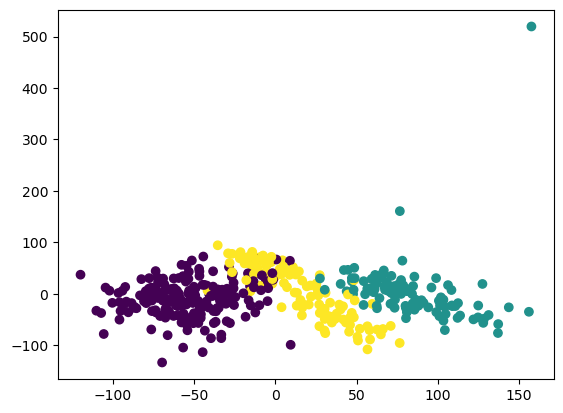

In [17]:
for i in range(pca.n_components_):
  for j in range(i+1,pca.n_components_):
    plt.show(plt.scatter(features_pca[:, i],features_pca[:, j], c=labels))

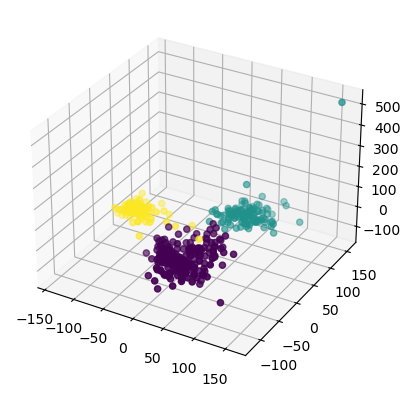

In [18]:
if pca.n_components_ > 2:
  fig3d = plt.figure()
  ax3d = fig3d.add_subplot(projection='3d')
  ax3d.scatter(features_pca[:, 0],features_pca[:, 1],features_pca[:, 2], c=labels)
  plt.show()